# Project name :2022 Billionaires in the world
# Project number : 10
# Eilon Dadon , Shlomo Kleinman , Shmuel Horn , Giyora Adler

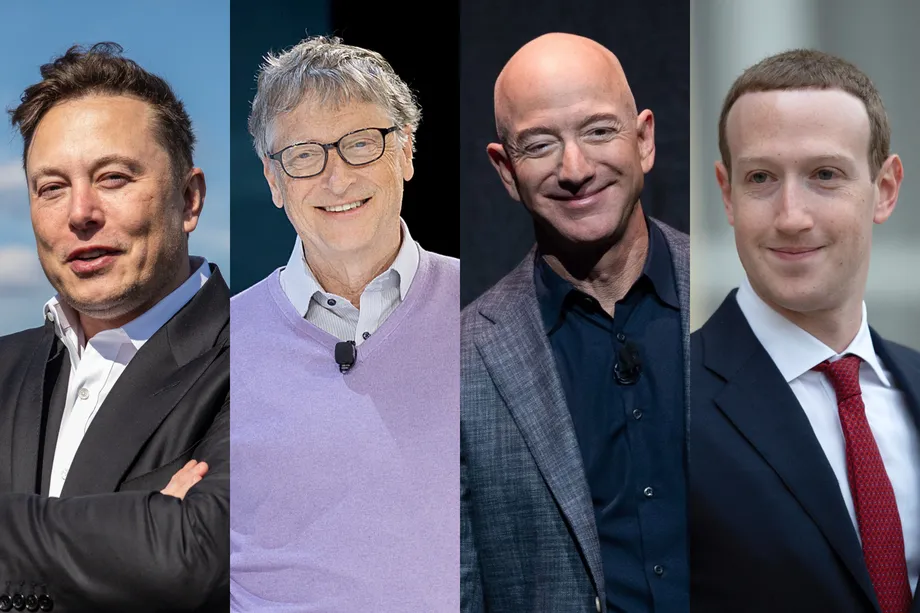

In [2]:
from IPython import display
display.Image('https://cdn.vox-cdn.com/thumbor/pBzCuxjg7BF4pez39BJ0wRM7h3E=/0x0:1800x1200/920x613/filters:focal(753x0:1041x288):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/69047461/headshots_1617069529743.0.jpg'
)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk # SciKit learn package
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/EilonDadon/Data-Science/main/project/forbes_2022_billionaires.csv'
df=pd.read_csv(url)
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


## Wrangling the data

In [4]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [6]:
billio_df = df[['personName','rank','age' , 'finalWorth','category','country','gender','philanthropyScore','selfMade']].copy()
billio_df.isnull().sum()

personName              0
rank                    0
age                    86
finalWorth              0
category                0
country                13
gender                 16
philanthropyScore    2272
selfMade                0
dtype: int64

In [7]:
billio_df.head()

,personName,rank,age,finalWorth,category,country,gender,philanthropyScore,selfMade
0,Elon Musk,1,50.0,219000.0,Automotive,United States,M,1.0,True
1,Jeff Bezos,2,58.0,171000.0,Technology,United States,M,1.0,True
2,Bernard Arnault & family,3,73.0,158000.0,Fashion & Retail,France,M,NaN,False
3,Bill Gates,4,66.0,129000.0,Technology,United States,M,4.0,True
4,Warren Buffett,5,91.0,118000.0,Finance & Investments,United States,M,5.0,True


In [8]:
billio_df.loc[billio_df['country'] == 'Israel'].value_counts().sum() #we have 23 israelies billioners in the list

0

#### we have 23 isralies in the list

 #






#
#





#

<span style="font-family: Arial; font-size:3.0em;color:red;"> In which country is the big money?</p> 
### we created data frame of final worth per country

In [9]:
country_rank = billio_df.groupby('country')[['finalWorth']].sum().reset_index()
country_rank.sort_values('finalWorth' ,ascending = False,inplace= True)
#country_rank

#### we present the top 30 countries in the world

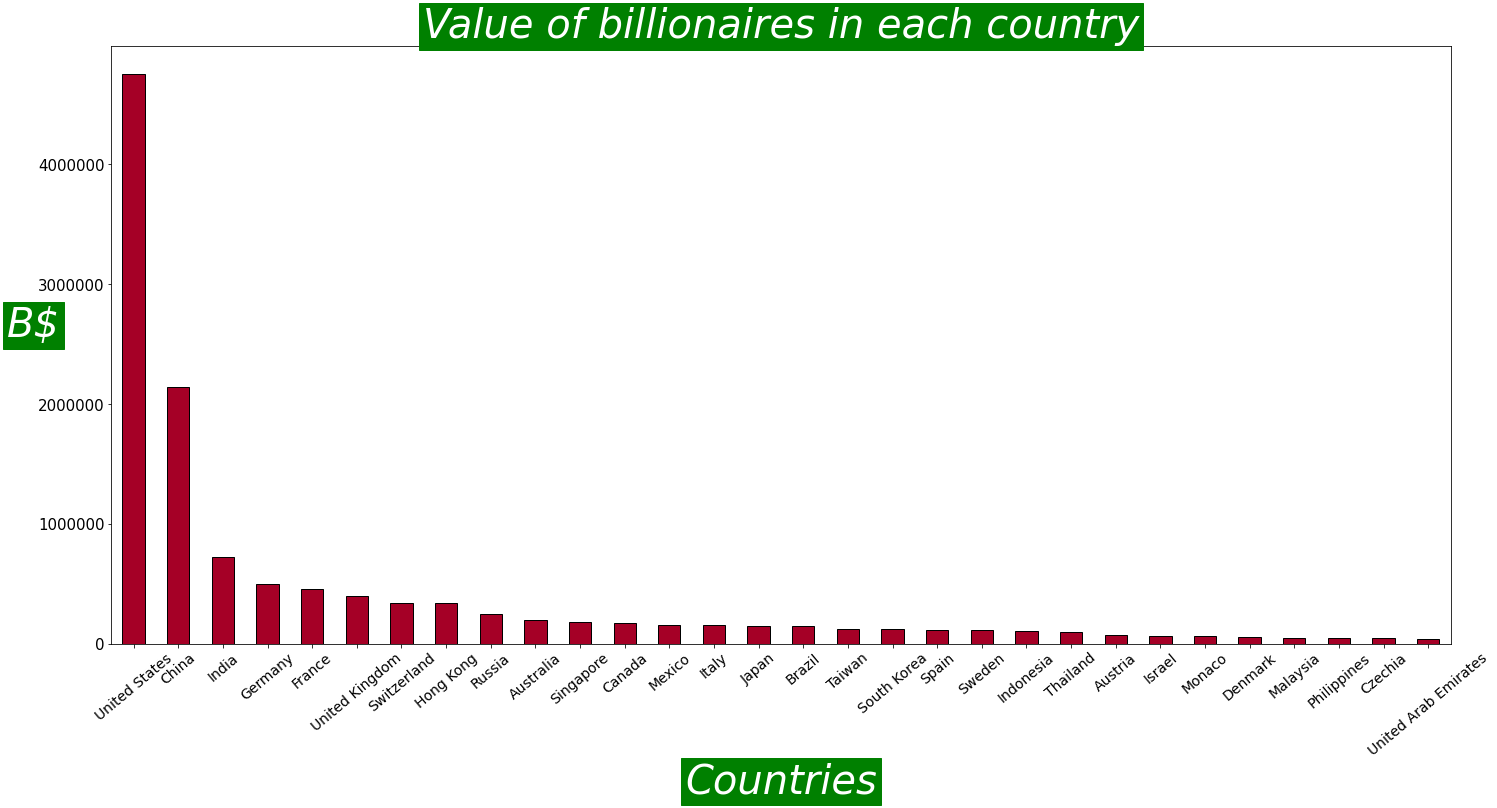

In [10]:
ax = country_rank.head(30).plot(kind = 'bar' , x = 'country' , y = 'finalWorth', figsize = (24,11),rot = 40, colormap = 'RdYlGn' , legend = False, edgecolor = 'black')
plt.title('Value of billionaires in each country', fontsize = 40 , color = 'white',fontstyle = 'italic' , backgroundcolor='green')
ax.set_xlabel('Countries',fontsize=40 ,color = 'white',fontstyle = 'italic' , backgroundcolor='green')
ax.set_ylabel('B$' , fontsize = 40, rotation = 0, color = 'white',fontstyle = 'italic' , backgroundcolor='green')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14)
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **we can see that most of the richest people's money in the world is in USA**
</p> 

 #






#
#





#

<span style="font-family: Arial; font-size:3.0em;color:red;"> What age has the most billionairs?</p> 

### dropping NaNs

In [11]:
billio_df.isnull().sum()

personName              0
rank                    0
age                    86
finalWorth              0
category                0
country                13
gender                 16
philanthropyScore    2272
selfMade                0
dtype: int64

In [12]:
billio_df['age'].dropna(inplace = True)

##  Showing graph

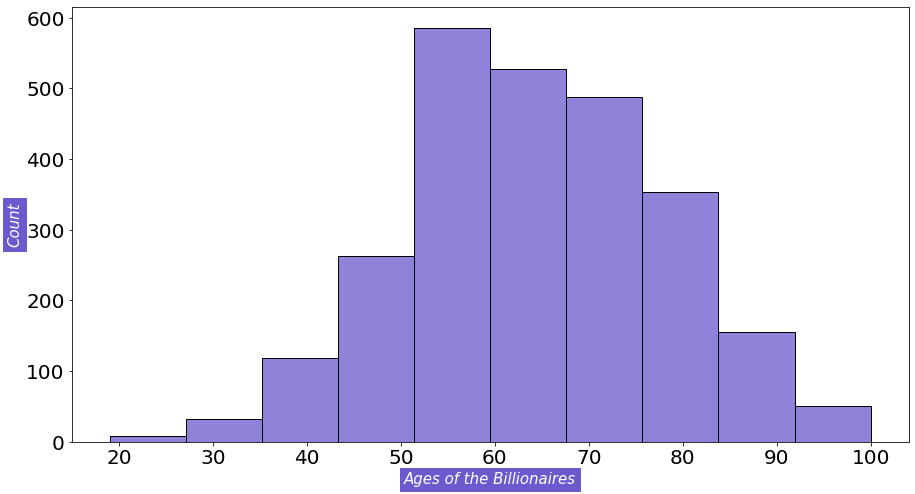

In [13]:
billio_df.sort_values('age' , ascending = True , inplace = True)
plt.figure(figsize = (15,8))
ax = sns.histplot(x = 'age' , data = billio_df ,color = 'slateblue' , bins = 10 , ec = 'black')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax.set_xlabel('Ages of the Billionaires',fontsize = 15,color = 'white',fontstyle = 'italic' , backgroundcolor='slateblue')
ax.set_ylabel('Count', fontsize = 15 ,rotation = 90 ,color = 'white',fontstyle = 'italic' , backgroundcolor='slateblue' ) 
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Around age of 60 we have the most rich people**
</p> 

 #






#
#





#

<span style="font-family: Arial; font-size:3.0em;color:red;"> Which categories have the most rich people by gender?</p> 

In [14]:
female=billio_df[billio_df.gender=='F']
female = female.groupby('category')[['finalWorth']].count()
female.sort_values('finalWorth',ascending = False,inplace = True)
female.reset_index(inplace = True)

In [15]:
male=billio_df[billio_df.gender=='M']
male = male.groupby('category')[['finalWorth']].count()
male.sort_values('finalWorth',ascending = False,inplace = True)
male.reset_index(inplace = True)

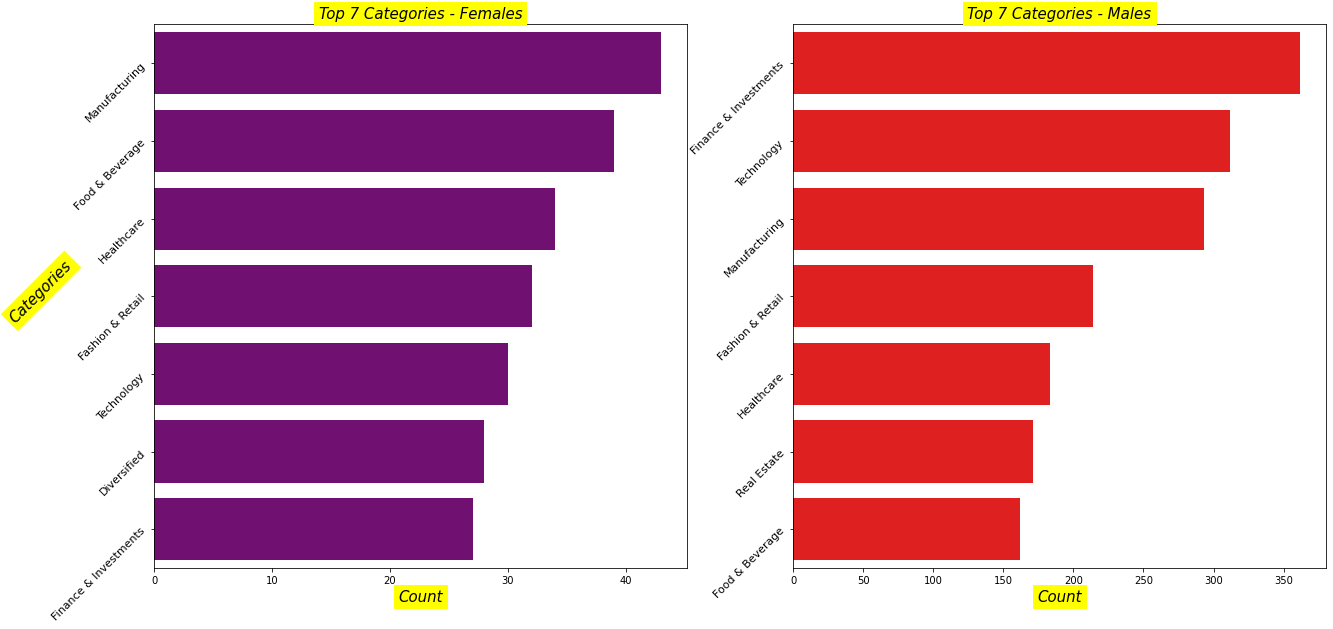

In [16]:
fig, axes = plt.subplots(figsize=(21,10), ncols=2)
female_plot = sns.barplot(data = female.head(7).sort_values('finalWorth' , ascending = False),x = 'finalWorth' ,y = 'category' , ax = axes[0],color = 'purple' )
male_plot = sns.barplot(data = male.head(7).sort_values('finalWorth' , ascending = False),x = 'finalWorth',y = 'category' , ax = axes[1], color = 'red')

male_plot.set_yticklabels(male_plot.get_yticklabels(),rotation = 45 , size = 11)
female_plot.set_yticklabels(female_plot.get_yticklabels(),rotation = 45 , size = 11)

male_plot.set_xlabel('Count',fontsize = 15,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
male_plot.set_ylabel(None) 

female_plot.set_xlabel('Count',fontsize = 15,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
female_plot.set_ylabel('Categories', fontsize = 15 ,rotation = 45 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' ) 

male_plot.set_title('Top 7 Categories - Males', fontsize = 15 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
female_plot.set_title('Top 7 Categories - Females', fontsize = 15 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')

plt.ticklabel_format(style='plain', axis='x')
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Conclusion: We can see that there are big differences. for example food and beverage is in the second place for females, and in 7th place for males**
</p> 

 #






#
#






#

<span style="font-family: Arial; font-size:3.0em;color:red;"> If I am a fund-raiser in US, who should I ask for money?</p>

#### First, we made a data frame with no nulls, of philanthropy scores in US by category and age

In [17]:
phil_df = df
phil_df['age'].dropna(inplace = True)
phil_df = phil_df.loc[phil_df['country'] == 'United States'].reset_index(drop = True)

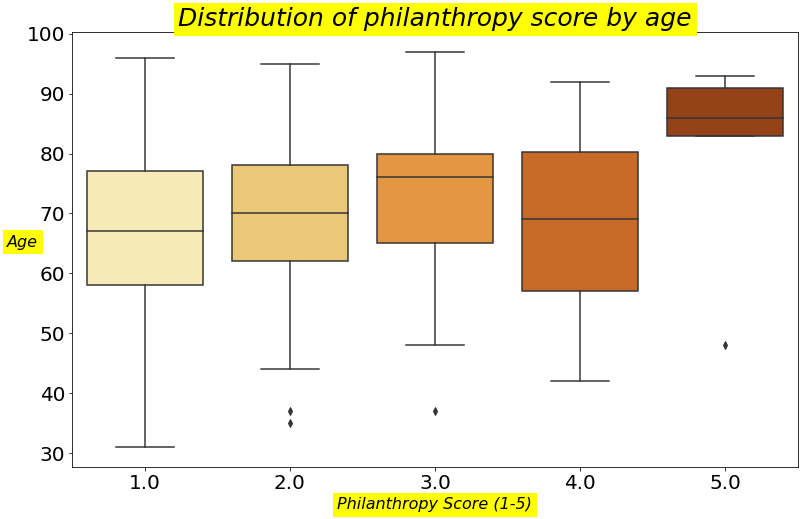

In [18]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data = phil_df , x = 'philanthropyScore' , y = 'age' , palette = 'YlOrBr')
ax.set_xlabel('Philanthropy Score (1-5)',fontsize = 16,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_ylabel('Age', fontsize = 16 ,rotation = 0 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center' ) 
plt.title('Distribution of philanthropy score by age', fontsize = 25 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **First of all, we can see that it is best to go rich people who are 80 and higher**
</p> 

#### philanthropy score by category 

In [19]:
phil_grouped = phil_df.groupby('category')[['philanthropyScore']].mean()
phil_grouped.sort_values('philanthropyScore', inplace = True)
phil_grouped.reset_index(inplace = True)
phil_grouped.dropna(inplace = True)

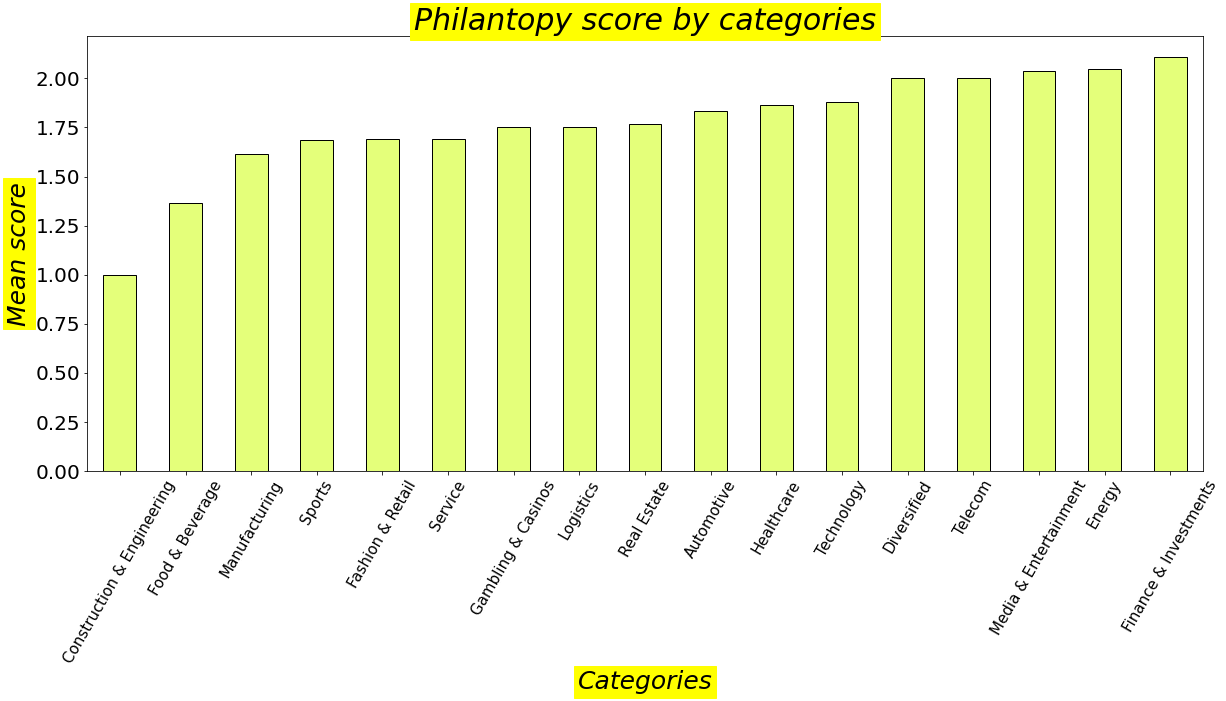

In [20]:
ax =phil_grouped.plot(kind = 'bar' , x = 'category' , y = 'philanthropyScore', figsize = (20,8),rot = 40, colormap = 'Wistia' , legend = False, edgecolor = 'black')
plt.title('Philantopy score by categories', fontsize = 30 , color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_xlabel('Categories',fontsize=25 ,color = 'black',fontstyle = 'italic' , backgroundcolor='yellow')
ax.set_ylabel('Mean score' , fontsize = 25, rotation = 90, color = 'black',fontstyle = 'italic' , backgroundcolor='yellow' , loc = 'center')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 15 , rotation = 60)
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Conclusion: if we want to fund-raise in US, best to go to rich people that are over 80 years old , and not in the construction & engineering field**
</p> 

  #






#
#





#

<span style="font-family: Arial; font-size:3.0em;color:red;"> **Which country's rich people work for their money?** </p> 

#### use groupby-agg to create a dataframe of countries with each attribute dealt with differently

In [21]:
countries_df=df.groupby('country').agg({'finalWorth': ['mean'],'age':['mean'], 'philanthropyScore': ['mean'],'selfMade': ['mean'], 'personName':['count']})
countries_df

,finalWorth,age,philanthropyScore,selfMade,personName
,mean,mean,mean,mean,count
country,,,,,
Algeria,5100.000000,78.000000,NaN,1.000000,1
Andorra,1300.000000,78.000000,NaN,0.000000,1
Argentina,2666.666667,86.250000,NaN,0.666667,6
Australia,4719.512195,65.575000,1.000000,0.707317,41
Austria,5791.666667,63.833333,NaN,0.666667,12
...,...,...,...,...,...
United Arab Emirates,4000.000000,61.375000,NaN,0.500000,10
United Kingdom,4644.705882,62.682927,2.000000,0.752941,85


#### dropping level to avoid multi-index

In [22]:
countries_df.columns = countries_df.columns.droplevel(0)
countries_df.columns=['finalWorth','age','philanthropyScore','selfMade','amount_of_rich']
countries_df

,finalWorth,age,philanthropyScore,selfMade,amount_of_rich
country,,,,,
Algeria,5100.000000,78.000000,NaN,1.000000,1
Andorra,1300.000000,78.000000,NaN,0.000000,1
Argentina,2666.666667,86.250000,NaN,0.666667,6
Australia,4719.512195,65.575000,1.000000,0.707317,41
Austria,5791.666667,63.833333,NaN,0.666667,12
...,...,...,...,...,...
United Arab Emirates,4000.000000,61.375000,NaN,0.500000,10
United Kingdom,4644.705882,62.682927,2.000000,0.752941,85
United States,6354.946524,65.967655,1.862245,0.735294,748


#### filter countries with less than 24 values, so that the mean is meaningful
##### why 24? because Israel has 24

In [23]:
countries_df=countries_df[countries_df['amount_of_rich']>23].copy()
countries_df.sort_values('selfMade' , inplace = True)

#### which country's richest people are most self-made?(made their money on their own)

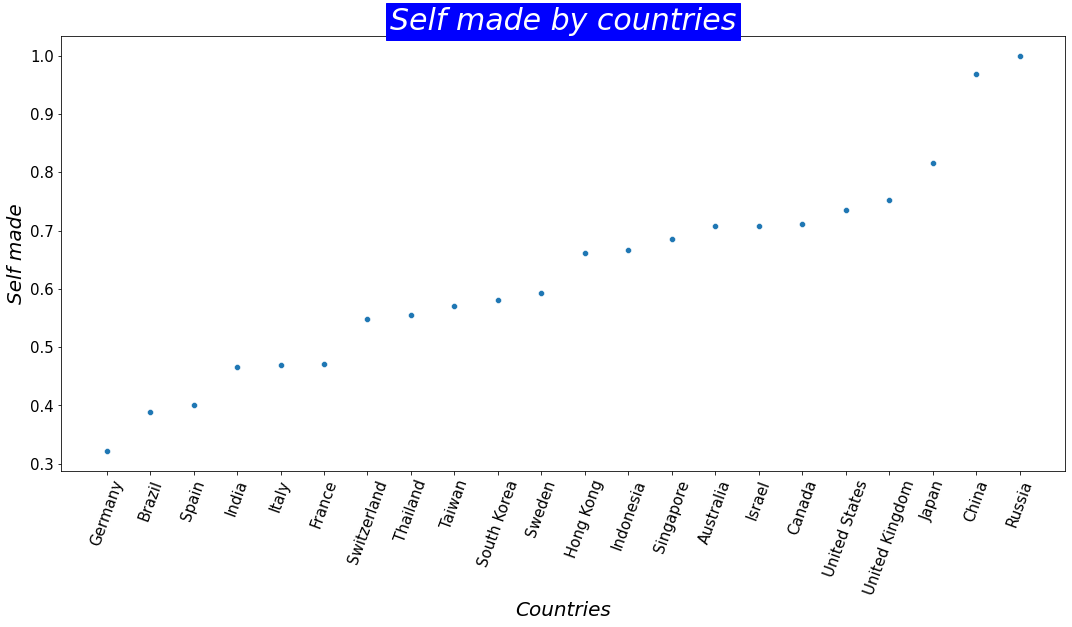

In [24]:
plt.figure(figsize=(18,8))
ax = sns.scatterplot(data=countries_df,x='country',y='selfMade')
plt.xticks(fontsize = 15,rotation=70)
plt.yticks(fontsize = 15)
ax.set_xlabel('Countries',fontsize=20 ,fontstyle = 'italic')
ax.set_ylabel('Self made',fontsize=20 ,fontstyle = 'italic')
plt.title('Self made by countries', fontsize = 30 , color = 'white',fontstyle = 'italic' , backgroundcolor='blue')
plt.show()

<span style="font-family: Arial; font-size:1.5em;color:blue;"> **Conclusion: The russian people work the hardest , and german people the least. Israel is in the 7th place (Start-up nation)**
</p> 

 #






#
#





# 

<span style="font-family: Arial; font-size:3.0em;color:red;"> **Prediction : how old is the billionair?** </p> 

#### make dataframe with features and no nans

In [25]:
billio_df=df[['rank','finalWorth','age','gender','country','category','city','selfMade']].dropna()
billio_df

,rank,finalWorth,age,gender,country,category,city,selfMade
0,1,219000.0,50.0,M,United States,Automotive,Austin,True
1,2,171000.0,58.0,M,United States,Technology,Seattle,True
2,3,158000.0,73.0,M,France,Fashion & Retail,Paris,False
3,4,129000.0,66.0,M,United States,Technology,Medina,True
4,5,118000.0,91.0,M,United States,Finance & Investments,Omaha,True
...,...,...,...,...,...,...,...,...
2663,2578,1000.0,66.0,M,China,Manufacturing,Tongxiang,True
2664,2578,1000.0,59.0,M,China,Technology,Beijing,True
2665,2578,1000.0,57.0,M,China,Manufacturing,Shanghai,True
2666,2578,1000.0,43.0,F,China,Energy,Zhangjiagang,True


#### choosing features and prediction label

In [26]:
X = pd.get_dummies(billio_df[['selfMade','finalWorth' ,'gender']])
y = billio_df['age']
X

,selfMade,finalWorth,gender_F,gender_M
0,True,219000.0,0,1
1,True,171000.0,0,1
2,False,158000.0,0,1
3,True,129000.0,0,1
4,True,118000.0,0,1
...,...,...,...,...
2663,True,1000.0,0,1
2664,True,1000.0,0,1
2665,True,1000.0,0,1
2666,True,1000.0,1,0


#### split to train and test data

In [27]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=34)

#### choosing model

In [28]:
billio_model = DecisionTreeRegressor(max_depth=3,random_state=34)
billio_model.fit(X_train, y_train);

#### predict

In [29]:
test_pred = billio_model.predict(X_test)

In [30]:
"MSE: {:.3f}".format( mean_squared_error(y_test.values, test_pred , squared=False ))

'MSE: 12.640'

### The *MSE* is only 12 years,  which is enough to identify the age group

#### plot tree

In [31]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True)  
    plt.show

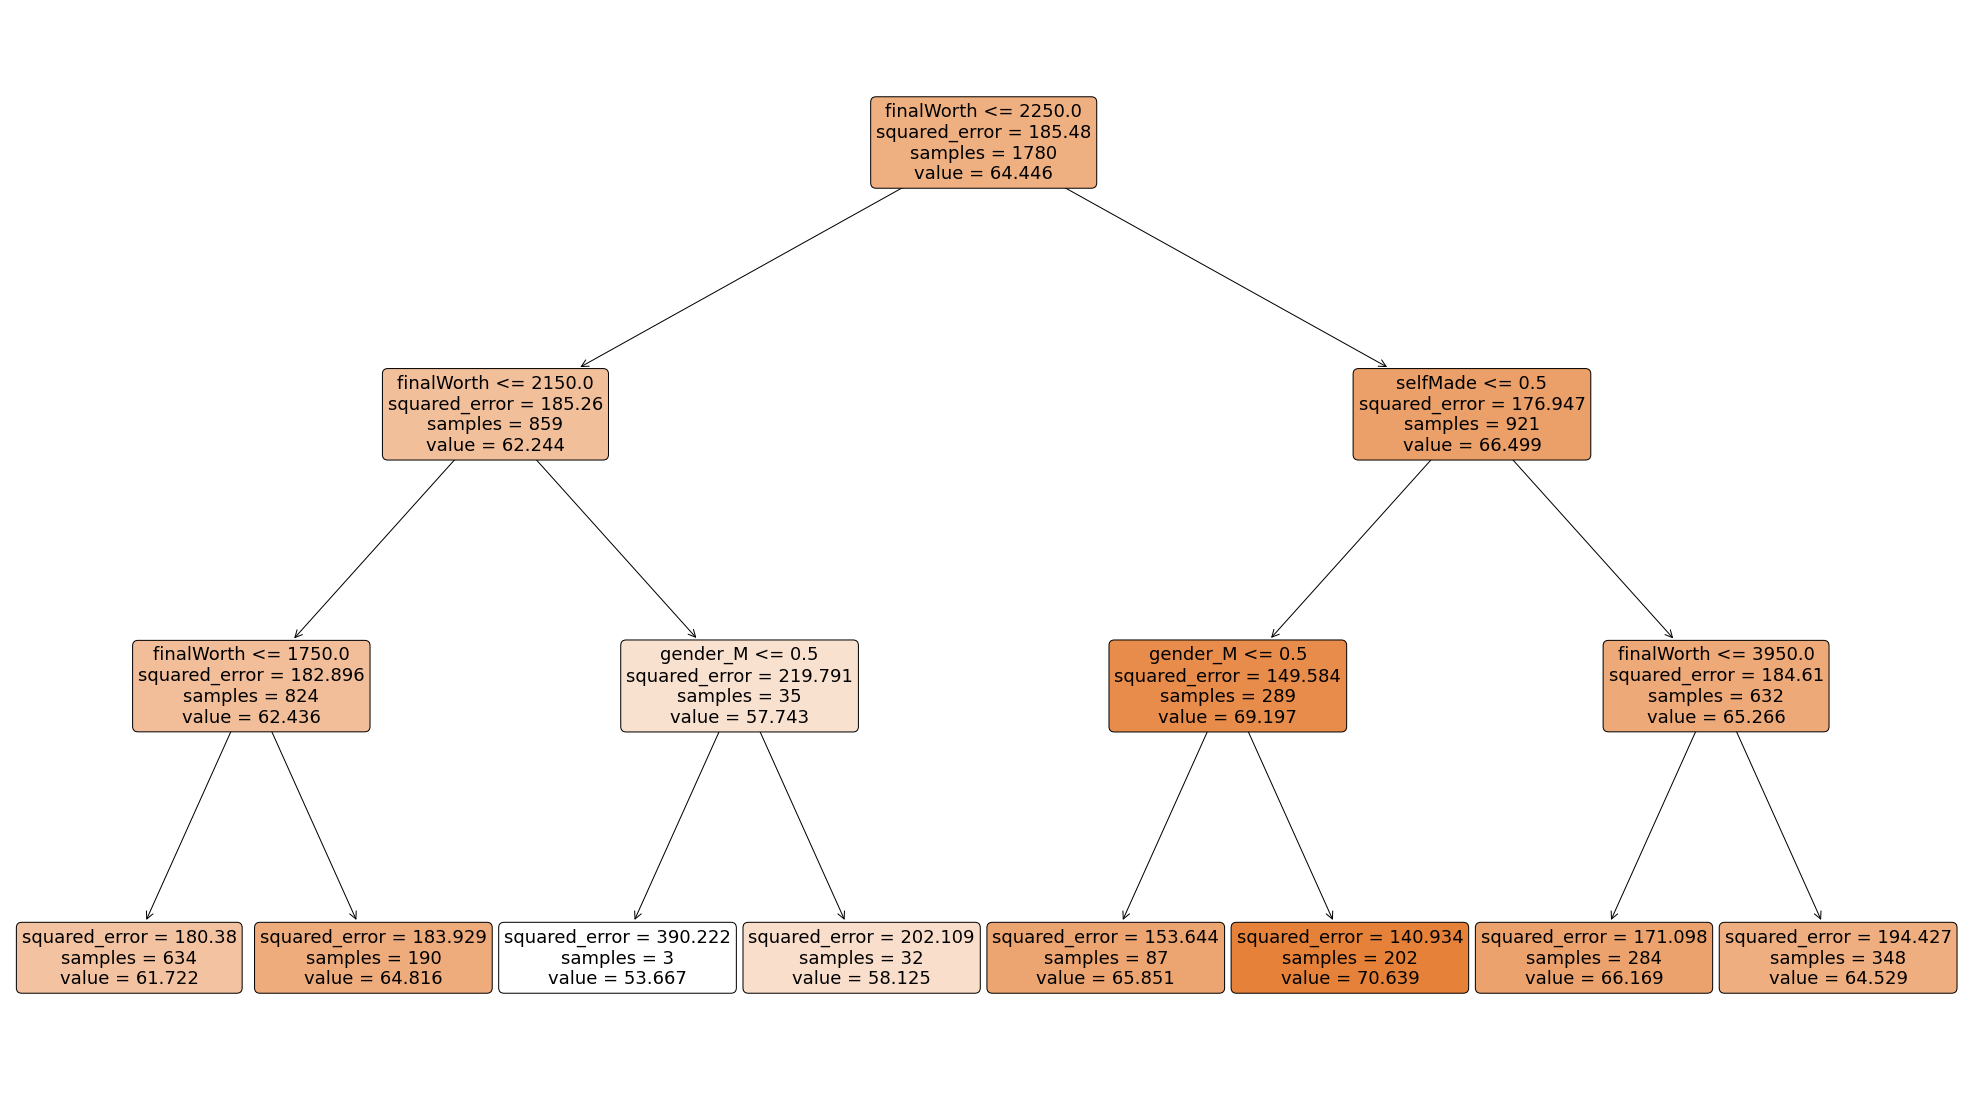

In [32]:
plot_tree(billio_model,X_test.columns,size=(35,20))
tree.plot_tree(billio_model , fontsize = 18, filled = True ,feature_names = X.columns ,rounded = True);

In [33]:
money = 200000
predict_age = billio_model.predict([[1,0,1,money]])
predict_age

C:\Users\eilon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([61.72239748])

<span style="font-family: Arial; font-size:3.0em;color:blue;"> **for example** </p> 